> Esse conjunto de dados se refere a população de veículos elétricos nos Estados Unidos.¶

O conjunto de dados possui 17 variáveis, são elas:
* **VIN (1-10)** - O Número de Identificação do Veículo, que identifica exclusivamente o veículo.
* **County** - O condado onde o veículo está registrado.
* **City** - A cidade onde o veículo está registrado.
* **State** - O estado onde o veículo está registrado.
* **Postal** Code - O código postal associado ao endereço de registro do veículo.
* **Model Year** - O ano em que o modelo do veículo foi fabricado.**
* **Make** - O fabricante ou marca do veículo (por exemplo, Tesla, Nissan).
* **Model** - O modelo específico do veículo (por exemplo, Model S, Leaf).
* **#E.v_Type** - Classificação do veículo elétrico, como veículo elétrico a bateria (BEV) ou veículo elétrico híbrido plug-in (PHEV).
* **CAFV** - Elegibilidade para Veículo de Combustível Alternativo Limpo (CAFV) Indica se o veículo se qualifica como um veículo de combustível alternativo limpo sob critérios específicos.
* **Electric Range** - A distância máxima que o veículo pode percorrer somente com energia elétrica, normalmente medida em milhas.
* **Base MSRP** - Preço de varejo sugerido pelo fabricante para o veículo antes de quaisquer opções ou recursos adicionais serem adicionados.
* **Legislative District** - O distrito legislativo no qual o veículo está registrado, o que pode afetar regulamentações ou incentivos locais. 
* **DOL Vehicle ID** - O ID do veículo do Departamento de Licenciamento, um identificador exclusivo usado pelo Departamento de Licenciamento do estado.
* **Vehicle Location** - Detalhes específicos da localização do veículo, onde ele está registrado ou localizado principalmente. 
* **Electric Utility** - A empresa de energia elétrica que fornece energia para o local do veículo. 
* **2020 Census Tract** - A área geográfica definida pelo US Census Bureau para fins estatísticos, o que ajuda na análise demográfica.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import zipfile
import warnings
import pathlib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer  # Importando o SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../input/electric-vehicle-population-in-usa/data.csv')

In [3]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,E.V_Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,PHEV,known,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,BEV,known,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,BEV,known,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,BEV,known,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,BEV,known,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   VIN (1-10)            205439 non-null  object 
 1   County                205436 non-null  object 
 2   City                  205436 non-null  object 
 3   State                 205439 non-null  object 
 4   Postal Code           205436 non-null  float64
 5   Model Year            205439 non-null  int64  
 6   Make                  205439 non-null  object 
 7   Model                 205438 non-null  object 
 8   E.V_Type              205439 non-null  object 
 9   CAFV                  205439 non-null  object 
 10  Electric Range        205431 non-null  float64
 11  Base MSRP             205431 non-null  float64
 12  Legislative District  204997 non-null  float64
 13  DOL Vehicle ID        205439 non-null  int64  
 14  Vehicle Location      205431 non-null  object 
 15  

In [5]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,205436.000000,205439.000000,205431.000000,205431.000000,204997.000000,2.054390e+05,2.054360e+05
mean,98177.971870,2020.960363,52.164342,922.670532,28.970848,2.277156e+08,5.297704e+10
std,2419.037479,2.989059,88.075859,7761.753602,14.910052,7.205737e+07,1.588435e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.935324e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.382368e+08,5.303303e+10
75%,98372.000000,2023.000000,48.000000,0.000000,42.000000,2.618718e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [6]:
print("Data Shape:",data.shape)

Data Shape: (205439, 17)


In [7]:
data.isnull().sum()

VIN (1-10)                0
County                    3
City                      3
State                     0
Postal Code               3
Model Year                0
Make                      0
Model                     1
E.V_Type                  0
CAFV                      0
Electric Range            8
Base MSRP                 8
Legislative District    442
DOL Vehicle ID            0
Vehicle Location          8
Electric Utility          3
2020 Census Tract         3
dtype: int64

In [8]:
print("Data Duplicated:",data.duplicated().sum())

Data Duplicated: 0


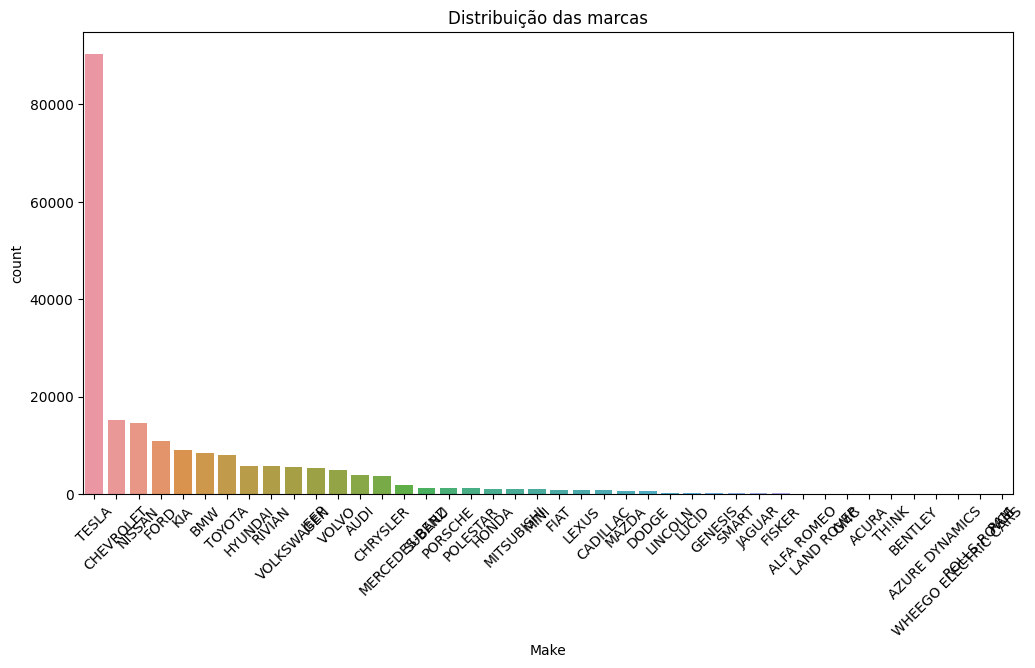

In [9]:
# Gráfico de distribuição de nacionalidades
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Make', order=data['Make'].value_counts().index)
plt.title('Distribuição das marcas')
plt.xticks(rotation=45)
plt.show()

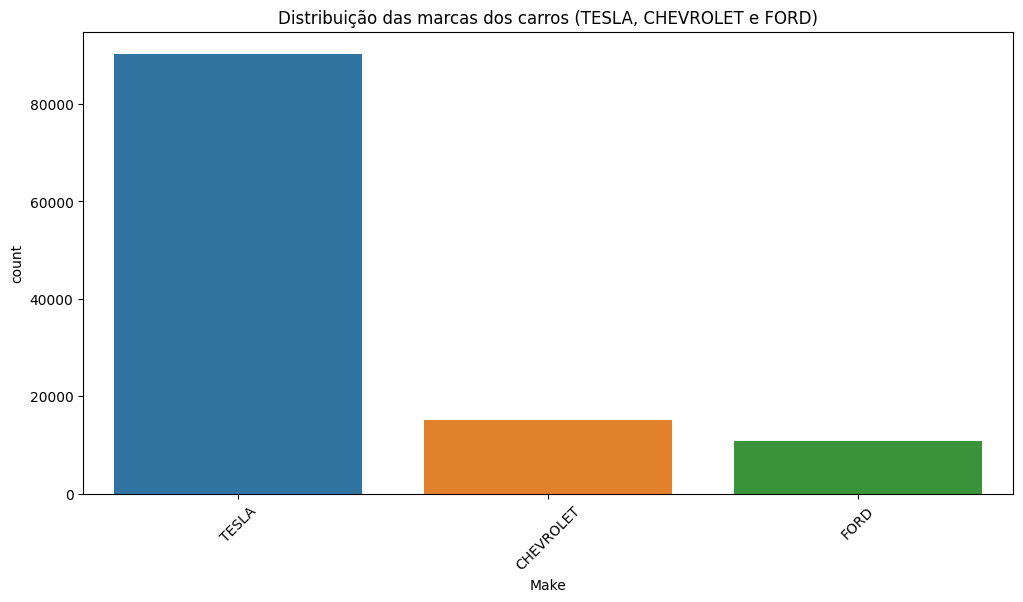

Total de registros filtrados: 116272
Valores únicos na coluna 'E.V_Type':
['BEV' 'PHEV']
Total de registros após agrupamento: 5
        Make E.V_Type  Count
0  CHEVROLET      BEV  10285
1  CHEVROLET     PHEV   4829
2       FORD      BEV   7124
3       FORD     PHEV   3716
4      TESLA      BEV  90318


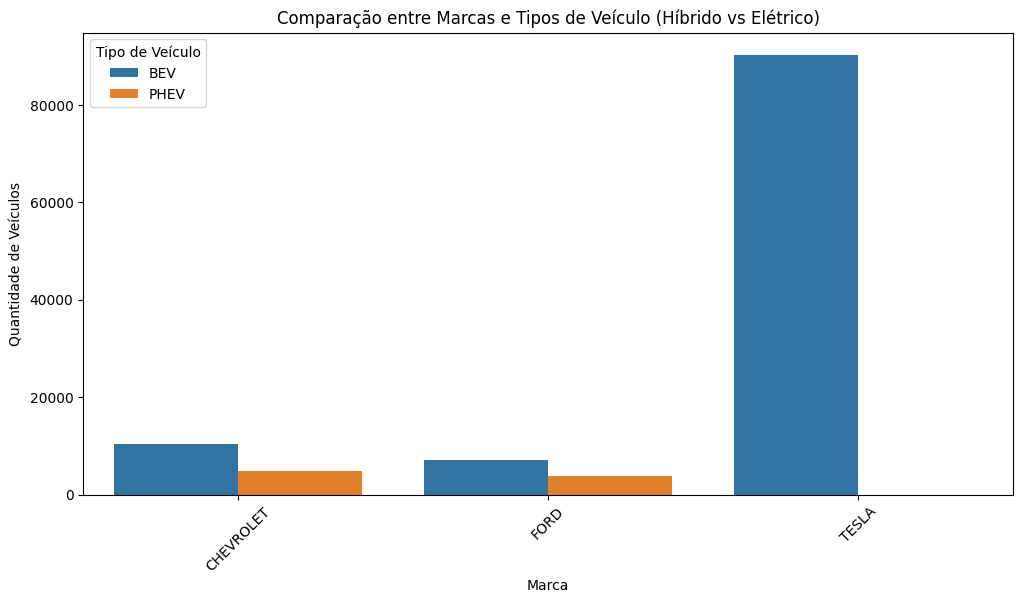

In [10]:
# Filtrar os dados para incluir 3 marcas mais populares
filtered_data = data[data['Make'].isin(['TESLA', 'CHEVROLET', 'FORD'])]

# Gráfico de distribuição de modelos filtrados
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='Make', order=filtered_data['Make'].value_counts().index)
plt.title('Distribuição das marcas dos carros (TESLA, CHEVROLET e FORD)')
plt.xticks(rotation=45)
plt.show()

# Filtrar as marcas desejadas
filtered_data = data[data['Make'].isin(['TESLA', 'CHEVROLET', 'FORD'])]

# Verificar se há registros após a filtragem
print(f"Total de registros filtrados: {len(filtered_data)}")

# Verificar os valores únicos da coluna 'E.V_Type' para garantir que está correta
print("Valores únicos na coluna 'E.V_Type':")
print(filtered_data['E.V_Type'].unique())

# Agrupar os dados por marca e tipo de veículo
grouped_data = filtered_data.groupby(['Make', 'E.V_Type']).size().reset_index(name='Count')

# Verificar se o DataFrame agrupado tem registros
print(f"Total de registros após agrupamento: {len(grouped_data)}")
print(grouped_data)

# Criar o gráfico se o DataFrame agrupado não estiver vazio
if not grouped_data.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=grouped_data, x='Make', y='Count', hue='E.V_Type')
    plt.title('Comparação entre Marcas e Tipos de Veículo (Híbrido vs Elétrico)')
    plt.xlabel('Marca')
    plt.ylabel('Quantidade de Veículos')
    plt.legend(title='Tipo de Veículo')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("O DataFrame agrupado está vazio. Verifique os dados de entrada.")

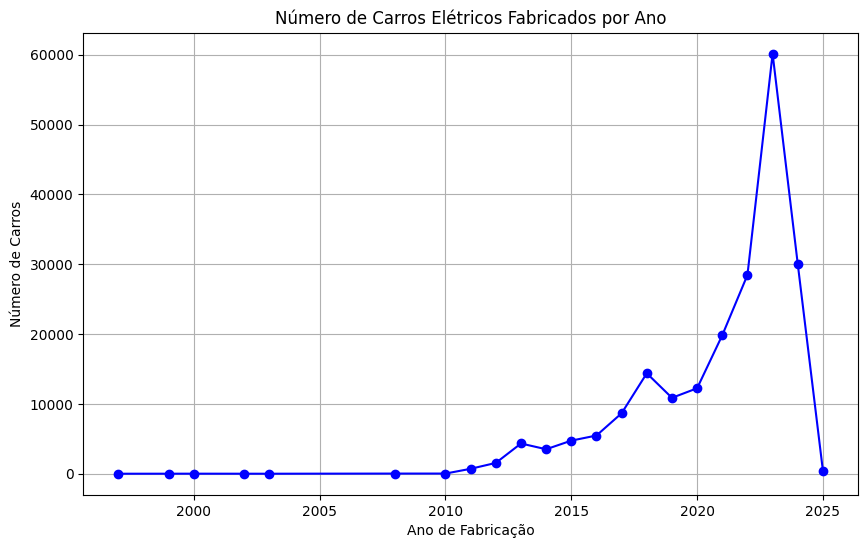

In [11]:
# Contar o número de carros fabricados por ano
car_count_per_year = data['Model Year'].value_counts().sort_index()

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(car_count_per_year.index, car_count_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Número de Carros Elétricos Fabricados por Ano')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Número de Carros')
plt.grid(True)
plt.show()

In [12]:
data['Make'].value_counts()

Make
TESLA                   90318
CHEVROLET               15114
NISSAN                  14525
FORD                    10840
KIA                      9104
BMW                      8481
TOYOTA                   7945
HYUNDAI                  5782
RIVIAN                   5679
VOLKSWAGEN               5638
JEEP                     5413
VOLVO                    4877
AUDI                     3918
CHRYSLER                 3693
MERCEDES-BENZ            1930
SUBARU                   1238
PORSCHE                  1232
POLESTAR                 1162
HONDA                    1078
MITSUBISHI               1018
MINI                     1015
FIAT                      799
LEXUS                     754
CADILLAC                  745
MAZDA                     711
DODGE                     665
LINCOLN                   299
LUCID                     289
GENESIS                   266
SMART                     248
JAGUAR                    243
FISKER                    186
ALFA ROMEO                 77
LAND 

In [13]:
data['City'].value_counts()

City
Seattle                    33328
Bellevue                   10235
Redmond                     7341
Vancouver                   7286
Bothell                     6769
                           ...  
Peoria                         1
Winterville                    1
Sarasota                       1
Aberdeen Proving Ground        1
Wishram                        1
Name: count, Length: 770, dtype: int64

In [14]:
data['Model'].value_counts()

Model
MODEL Y           43437
MODEL 3           32113
LEAF              13488
MODEL S            7881
BOLT EV            6727
                  ...  
A8 E                  2
PROMASTER 3500        2
918                   1
S-10 PICKUP           1
ESPRINTER             1
Name: count, Length: 152, dtype: int64

In [15]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [16]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,E.V_Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,PHEV,known,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,BEV,known,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,BEV,known,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,BEV,known,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,BEV,known,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [17]:
#Regressão Logística: Prever se o veículo realmente é 100% elétricou ou um carro híbrido

# Selecionar as colunas relevantes
X = data[['Model Year', 'Electric Range', 'Base MSRP']]  # Features numéricas
y = data['E.V_Type'].apply(lambda x: 1 if x == 'BEV' else 0)  # Target: 1 para BEV (100% elétrico), 0 para PHEV (híbrido)

# Preencher valores ausentes nas features com a média
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar os dados para normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Acurácia: 0.7994548286604362

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.65      0.14      0.23      8801
           1       0.81      0.98      0.88     32287

    accuracy                           0.80     41088
   macro avg       0.73      0.56      0.56     41088
weighted avg       0.77      0.80      0.74     41088


Matriz de Confusão:
 [[ 1212  7589]
 [  651 31636]]


In [18]:
#Decision Tree Models

Mean Squared Error (Electric): 3630132.472
R² Score (Electric): 0.6961317696801306
Mean Squared Error (Hybrid): 1041220.7919999998
R² Score (Hybrid): 0.5613863547273216


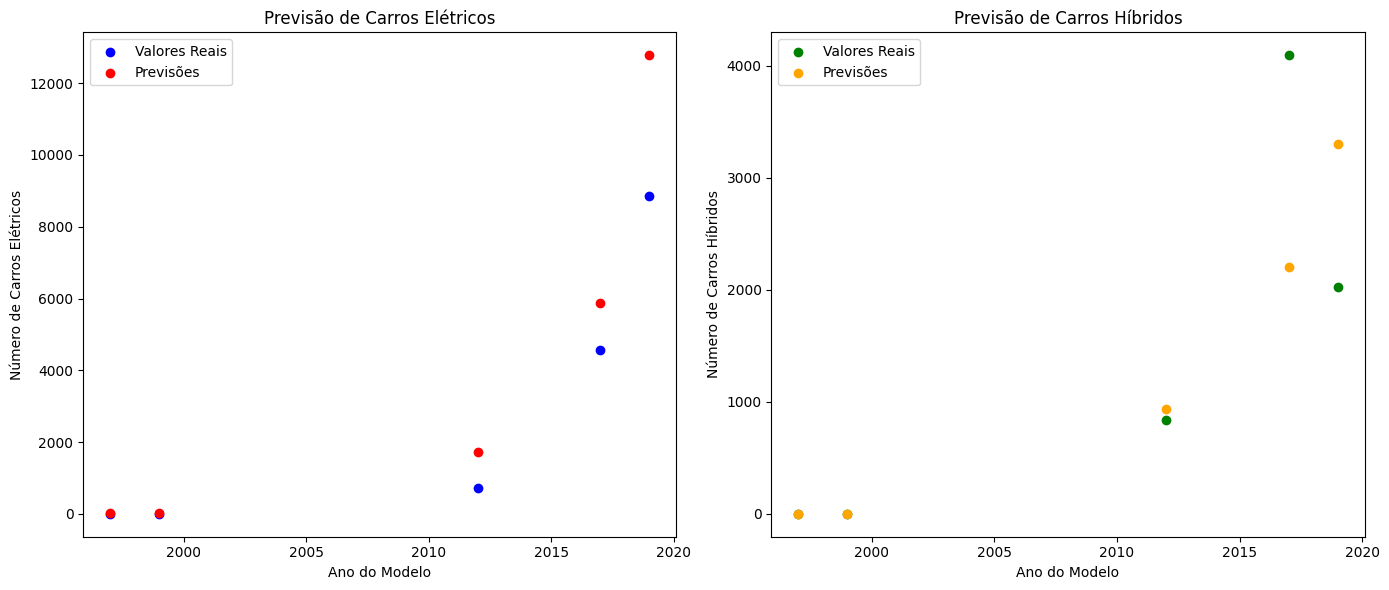

In [19]:
#KNN -> Prever número de carros elétricos ou híbridos com o passar dos anos

# 1. Selecionar as colunas relevantes
data['Electric'] = data['E.V_Type'].apply(lambda x: 1 if x == 'BEV' else 0)
data['Hybrid'] = data['E.V_Type'].apply(lambda x: 1 if x == 'PHEV' else 0)

# Agrupar dados por ano e somar o número de veículos elétricos e híbridos
grouped_data = data.groupby('Model Year').agg({'Electric': 'sum', 'Hybrid': 'sum'}).reset_index()

# 2. Preparar os dados
X = grouped_data[['Model Year']]
y_electric = grouped_data['Electric']  # Alvo para carros elétricos
y_hybrid = grouped_data['Hybrid']  # Alvo para carros híbridos

# 3. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train_electric, y_test_electric = train_test_split(X, y_electric, test_size=0.2, random_state=42)
X_train, X_test, y_train_hybrid, y_test_hybrid = train_test_split(X, y_hybrid, test_size=0.2, random_state=42)

# 4. Criar e treinar o modelo KNN para carros elétricos
knn_electric = KNeighborsRegressor(n_neighbors=5)  # Você pode ajustar o número de vizinhos
knn_electric.fit(X_train, y_train_electric)

# Fazer previsões
y_pred_electric = knn_electric.predict(X_test)

# 5. Avaliar o modelo para carros elétricos
mse_electric = mean_squared_error(y_test_electric, y_pred_electric)
r2_electric = r2_score(y_test_electric, y_pred_electric)
print(f'Mean Squared Error (Electric): {mse_electric}')
print(f'R² Score (Electric): {r2_electric}')

# Criar e treinar o modelo KNN para carros híbridos
knn_hybrid = KNeighborsRegressor(n_neighbors=5)  # Você pode ajustar o número de vizinhos
knn_hybrid.fit(X_train, y_train_hybrid)

# Fazer previsões
y_pred_hybrid = knn_hybrid.predict(X_test)

# Avaliar o modelo para carros híbridos
mse_hybrid = mean_squared_error(y_test_hybrid, y_pred_hybrid)
r2_hybrid = r2_score(y_test_hybrid, y_pred_hybrid)
print(f'Mean Squared Error (Hybrid): {mse_hybrid}')
print(f'R² Score (Hybrid): {r2_hybrid}')

# Visualizar as previsões
plt.figure(figsize=(14, 6))

# Gráfico para carros elétricos
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test_electric, color='blue', label='Valores Reais')
plt.scatter(X_test, y_pred_electric, color='red', label='Previsões')
plt.title('Previsão de Carros Elétricos')
plt.xlabel('Ano do Modelo')
plt.ylabel('Número de Carros Elétricos')
plt.legend()

# Gráfico para carros híbridos
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test_hybrid, color='green', label='Valores Reais')
plt.scatter(X_test, y_pred_hybrid, color='orange', label='Previsões')
plt.title('Previsão de Carros Híbridos')
plt.xlabel('Ano do Modelo')
plt.ylabel('Número de Carros Híbridos')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
#Método Support Vector Classifier

#A idéia desse algorítimo é fazer a máquina prever se o veículo é 100% elétrico ou híbrido usando as variáveis: Ano de lançamento, alcance elétrico,
#base de alguns preços registrados no conjunto de dados e foi gerada uma variável low_range_threshold para parametrizar um curto alcance normalmente,
#alcançado por um veículo híbrido, pois a bateria é bem menor comparada as de carros 100% elétricos

# Criar uma nova coluna para indicar se o alcance é considerado baixo para PHEV
# Aqui você pode definir o limite do que considera baixo, por exemplo, 30 milhas
low_range_threshold = 30  # Você pode ajustar este valor conforme necessário
data['Low_Electric_Range'] = data['Electric Range'].apply(lambda x: 1 if x < low_range_threshold else 0)

# Usar uma amostra de 10% do conjunto de dados
data_sample = data.sample(frac=0.1, random_state=42)

X = data_sample[['Model Year', 'Electric Range', 'Base MSRP', 'Low_Electric_Range']]  # Incluindo a nova feature
y = data_sample['E.V_Type'].apply(lambda x: 1 if x == 'BEV' else 0)  # Target: 1 para BEV (100% elétrico), 0 para PHEV (híbrido)

# Preencher valores ausentes nas features com a média
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar os dados para normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de SVC
model = SVC(kernel='linear')  # Você pode mudar o kernel para 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))


Acurácia: 0.8822097834022876

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.52      0.64       838
           1       0.89      0.97      0.93      3271

    accuracy                           0.88      4109
   macro avg       0.86      0.75      0.79      4109
weighted avg       0.88      0.88      0.87      4109


Matriz de Confusão:
 [[ 437  401]
 [  83 3188]]


Mean Squared Error: 2063.2832376419983
R² Score: 0.7358137508563489


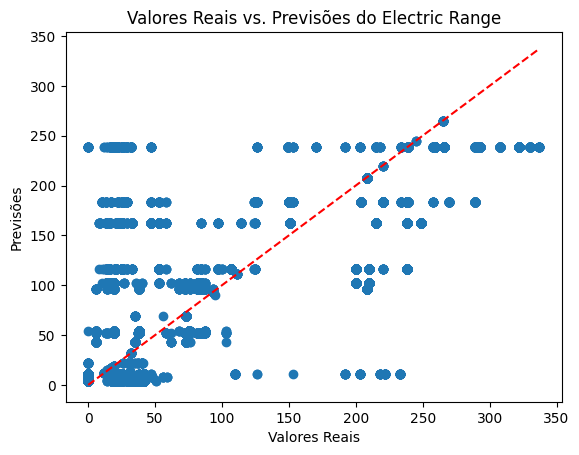

In [21]:
#O objetivo do script é prever o Electric Range que estar por vir com as melhorias tecnológicas das empresas

#Método: Random Forest

# Remover linhas com valores ausentes
data.dropna(inplace=True)

# Selecionar as colunas relevantes para prever
X = data[['Model Year', 'Base MSRP']]  # Features numéricas
y = data['Electric Range']  # Variável alvo

# Preencher valores ausentes nas features (se necessário)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Normalização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo de Random Forest para regressão
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Gráfico de dispersão para visualizar previsões
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões do Electric Range')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha de referência
plt.show()
